In [1]:
import warnings

import numpy as np
import pandas as pd
from generate_prob_chart import generate_dest_prob_chart, generate_prob_chart
from matplotlib import pyplot as plt
from matplotlib import rc
from matplotlib.axes import Axes

rc('font', family='D2Coding')
warnings.filterwarnings("ignore")

Let $d_i$ be a probability to arrive at StarForce $i+1$ starting from $i$. Then,
\begin{align*}
    d_i &= p_{i, s} + p_{i, f}(p_{i-1, s}d_i + p_{i-1, f}d_{i-1}d_i + p_{i-1, r}d_{i-1}d_i) + p_{i, r}d_i \\
    &= p_{i, s} + p_{i, f}d_i(p_{i-1, s} + p_{i-1, f}d_{i-1} + p_{i-1, r}d_{i-1}) + p_{i, r}d_i \\
    &= \frac{p_{i, s}}{1-p_{i, r}-p_{i, f}(p_{i-1, s} + (p_{i-1, r} + p_{i-1, f})d_{i-1})}
\end{align*}

Let $d_{i, j}$ be a probability to arrive at StarForce $j$ starting from $i$. Then,
\begin{align*}
    d_{i, j} &= d_{i, i+1} \times d_{i+1, i+2} \times \cdots \times d_{j-1, j} \\
    &= \prod_{k=i}^{j-1} d_k
\end{align*}

+ Destruction count follows a geometric distribution. Let $a_n$ be the probability that $n$ times of destruction occurs.
\begin{align*}
    a_0 &= p \\
    a_n &= (1-S_{n-1})p \\
    S_n &= a_0 + \cdots + a_{n-1} + a_n \\
    &= a_0 + \cdots + a_{n-1} + -pS_{n-1} + p \\
    &= (1-p)S_{n-1} + p \\
    \Rightarrow S_n - 1 &= (1-p)(S_{n-1} - 1) \\
    S_0 - 1 &= -(1-p), \quad S_n - 1 = -(1-p) \cdot (1-p)^n = -(1-p)^{n+1} \\
    S_n &= 1 - (1-p)^{n+1} \underset{n\rightarrow\infty}{\rightarrow} 1 \\
    a_n &= S_n - S_{n-1} = (1-p)^n - (1-p)^{n+1} = (1-p)^n p
\end{align*}
+ Let $b_n$ be the probability that $n \geq 1$ pure items are required. Then, $b_n = (1-p)^{n-1}p$. Hence, destruction count or required amount of pure items follows geometric distribution.

In [2]:
def draw_dest_prop(start, end, starcatch=False, event_15=False, dest_prevention=False, max_dest=10):
    dest_chart = generate_dest_prob_chart(starcatch, event_15, dest_prevention, pretty=False)
    dest_prop = []
    dest_prop.append(dest_chart.loc[end, start])
    for _ in range(max_dest):
        dest_prop.append((1-sum(dest_prop)) * dest_chart.loc[end, 15])
    
    fig, (ax1, ax2) = plt.subplots(1, 2, dpi=100, figsize=(14, 4))
    ax1: Axes; ax2: Axes
    
    bool_to_text = lambda x: "O" if x is True else "X"
    fig.suptitle(f'StarForce {start:2d} -> {end:2d}\nStarcatch: {bool_to_text(starcatch):>14}\n15+1: \
                 {bool_to_text(event_15):>2s}\nDestruction Prevention: {bool_to_text(dest_prevention):1s}')
    fig.subplots_adjust(bottom=0, top=0.775)

    ax1.bar(range(max_dest+1), dest_prop)
    ax1.set_xlabel('Destruction Count')
    ax1.set_ylabel('Proportion')
    ax1.set_ylim((0, np.ceil(dest_prop[0]*10)/10))
    ax1.set_xticks(range(max_dest+1), range(max_dest+1))
    ax1.set_yticklabels([f'{prop:5.1%}' for prop in ax1.get_yticks()])
    ax1.set_title('individual')

    ax2.bar(range(max_dest+1), [sum(dest_prop[:i+1]) for i in range(max_dest+1)])
    ax2.set_xlabel('Cumulative Destruction Count')
    ax2.set_ylabel('Proportion')
    ax2.set_ylim((0, 1))
    ax2.set_xticks(range(max_dest+1), range(max_dest+1))
    ax2.set_yticks([0.1*i for i in range(max_dest+1)], [f'{0.1*i:4.0%}' for i in range(max_dest+1)])
    ax2.set_title(f'cumulative')

    return dest_prop

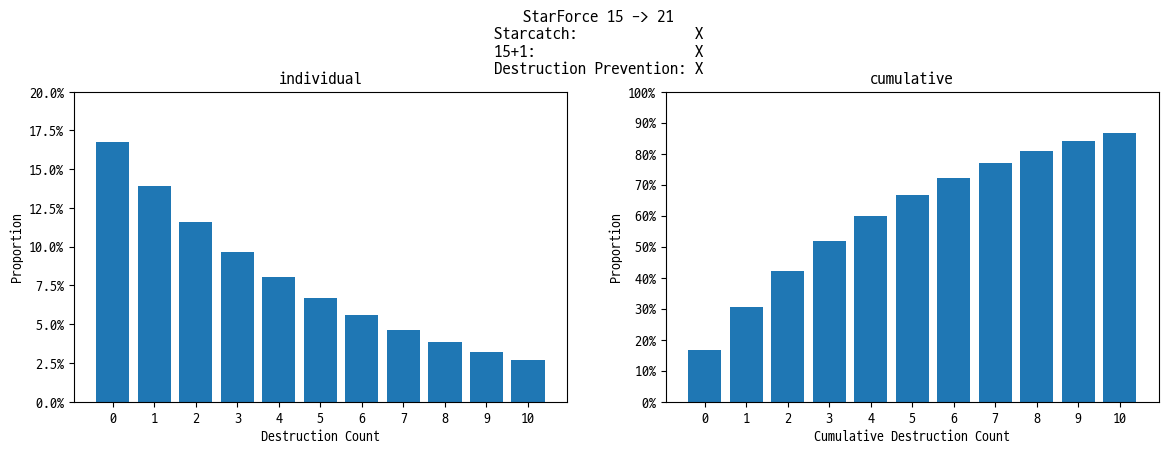

In [3]:
dest_prop = draw_dest_prop(15, 21)